<h1><center>Cruise Reviews - Trip Advisor - Models</center></h1>

![title](Screen.png)

## Importing Libraries & Defining functions

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
from datetime import datetime

# Preprocessing
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#Model Assestment
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score, recall_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

#Models
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings('ignore')
#Add settings for SNS

In [99]:
def save_pickle(element,file):
    with open(file, 'wb') as handle:
        pickle.dump(element, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def load_pickle(file):
    with open(file, 'rb') as handle:
        return pickle.load(handle)

## Loading Data

In [100]:
# Reviews Content
reviews = pd.read_csv('reviews_step_5.csv', index_col=0)
print(reviews.shape)
reviews.head(3)

(9596, 31)


,Unnamed: 0.1,ship_link,links,user_date,user_link,user_contributions,user_helpful_votes,stars,title,content,...,vader_title_compound,vader_title_neg,vader_title_neu,vader_title_pos,vader_content_compound,vader_content_neg,vader_content_neu,vader_content_pos,stars_grouped,word_count
0,0,/Cruise_Review-d15691636-Reviews-MSC_Meraviglia,/ShowUserReviews-g1-d15691636-r743487186-MSC_M...,Tony K|Yesterday,/Profile/L9746OCtonyk,62,5,4,MSC Meraviglia Yacht Club,We sailed on the MSC Meraviglia for the first ...,...,0.000,0.0,1.000,0.000,0.9979,0.066,0.780,0.154,Good Review,820
1,1,/Cruise_Review-d15691636-Reviews-MSC_Meraviglia,/ShowUserReviews-g1-d15691636-r743427041-MSC_M...,ann b|Yesterday,/Profile/bhayden,10,11,1,never again,This ship is a huge nightmare. I am in decent...,...,0.000,0.0,1.000,0.000,0.8902,0.108,0.728,0.165,Bad Review,159
2,2,/Cruise_Review-d15691636-Reviews-MSC_Meraviglia,/ShowUserReviews-g1-d15691636-r743305803-MSC_M...,Lsabina11|5 Feb,/Profile/Lsabina11,289,57,5,Awesome experience at great value,Four of us just came back from a MSC Meravigli...,...,0.891,0.0,0.159,0.841,0.9969,0.053,0.652,0.295,Good Review,219


In [101]:
word_type_df = load_pickle('word_type.pkl')

In [102]:
word_type_df

,ADJ,ADP,ADV,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,SCONJ,SPACE,SYM,VERB,X,word_count,stars_grouped
0,2nd fair stunning awesome amazing smooth simil...,unlike,pretty greatly slightly anymore unfortunately ...,and/or,,,time sailing pros cons trip promenade screen c...,2020 2 2 3 2 3,,,msc meraviglia january western caribbean msc y...,like despite,...,/,sailed balanced found improve having sailed ex...,,386,Good Review
1,huge decent major aft good efficient polite co...,,partly matter later best maybe,,,yes,ship nightmare shape venue deal elevators sect...,4,,,why?food mediocre al dente carrots americans e...,,,/,walking wait send requested came know hire eat...,,107,Bad Review
2,happy wonderful negative worried large beautif...,,little freshly onboard highly,,,,cruise experience reviews complaints ship faci...,"5,000",,,msc meraviglia caribbean shampoo msc meraviglia,,,,came read ate like eat baked order having incl...,i’ve,108,Good Review
3,bad excellent small little ready normal small ...,,overall early maybe maybe,,,oh sorry,cruise adventure things trip food balcony buff...,10087 2:30pm 4pm 4pm 6pm 6pm 20 15 7:30pm 5:30...,,,cabin bella supervisor security security x ray...,,,,enjoyed boarded wait called said arrive arrive...,wen't,174,Good Review
4,important worried long long wrong half quick e...,,purely little walkway away absolutely rarely e...,,,,cruise ship relaxation ports review embarkatio...,5080,,,playa del carmen mexico meraviglia caribbean b...,near like like like,,#,live enjoying live said let begin admit gettin...,,453,Good Review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9591,interesting clean clean tired unorganized,,,,,,day room coffee table refrigerator info langua...,20,,,europe miami trip un genoa,like,,,crossing ask vents went heard share asked fill...,,37,Bad Review
9592,charming nice proper efficient true profession...,,promptly specially efficiently,,,,cruise experience corner suite member crew eye...,2014 2015,,,divina divina msc,,,,enjoyed decided repeat splurged feel look list...,,60,Good Review
9593,second beautiful great friendly good best beau...,,,,,yes,time ship pizzas ship friends pm shows slices ...,10 france!!!!next,,,la guadeloupe french island french france fran...,,,,travel feel resist stop visit speak came went ...,,78,Good Review
9594,transatlantic long interesting good limited ni...,,reasonably hard,,,,cruise days time people world food choices lob...,21 7 4 2 1 5 6,,,france africa russia germany spain italy u.s. ...,,,-,enjoyed meet buy understand limited recorded,etc,71,Bad Review


## Extracting Adjectives, Adverbs and verbs only
Based on the fact there are almost no differences in the nouns being used. There are exceptions to this (for example nightmare), but these add very little predicting power to the model.

In [103]:
reviews['aav'] = word_type_df.apply(lambda x: x['ADJ']+' '+x['VERB']+' '+x['NOUN'], axis = 1)

In [104]:
word_type_df.shape

(9596, 18)

In [105]:
reviews.shape

(9596, 32)

In [106]:
reviews.shape

(9596, 32)

## Preparing Features and Target

In [112]:
# Defining predictors
X = reviews[['vader_content_compound', 
                        'vader_content_neg',
                        'vader_content_neu', 
                        'vader_content_pos',
                        'word_count']]

#Separating content for train test split and subsequent tdif vectorisation
C = reviews.aav

#Defining target
y = reviews.stars_grouped


print('Size of X: {}'.format(X.shape))
print('Size of C: {}'.format(C.shape))
print('Size of y: {}'.format(y.shape))

Size of X: (9596, 5)
Size of C: (9596,)
Size of y: (9596,)


## Train and Test Split

In [113]:
Xtrain, Xtest,Ctrain,Ctest, ytrain, ytest = train_test_split(X,C,y,test_size = 0.3, stratify = y, random_state = 14)

In [114]:
print(len(Xtrain),len(Xtest),len(Ctrain),len(Ctest),len(ytrain),len(ytest))

6717 2879 6717 2879 6717 2879


## TFID Vectorising

In [115]:
#Instantiating Vectoriser
content_tvec = TfidfVectorizer(strip_accents='unicode', ngram_range=(1,1),stop_words = 'english',max_df=0.5, min_df=0.02)

#Fitting tfid based on Ctrain Data and transforming both train and test data.
train_matrix = content_tvec.fit_transform(Ctrain)
test_matrix = content_tvec.transform(Ctest)

#Saving Train TFID into DataFrame
train_tfid_df = pd.DataFrame(train_matrix.toarray(),
                            columns= list(map(lambda x : 'tfid - '+ x, list(content_tvec.get_feature_names()))),
                            index = Ctrain.index)

#Saving Test TFID into DataFrame
test_tfid_df = pd.DataFrame(test_matrix.toarray(),
                            columns=list(map(lambda x : 'tfid - '+ x, list(content_tvec.get_feature_names()))), 
                            index = Ctest.index)

In [116]:
#Joining data with tfid matrices
Xtrain = pd.concat([Xtrain,train_tfid_df], axis=1)
Xtest = pd.concat([Xtest,test_tfid_df], axis=1)
print(Xtrain.shape,Xtest.shape)

(6717, 638) (2879, 638)


## Standardising & turning into Sparse Matrix

In [117]:
# Keeping mean to work with Sparse Matrix
scaler = StandardScaler(with_mean = True)
Xtrain_std = pd.DataFrame(scaler.fit_transform(Xtrain),columns = Xtrain.columns, index = Xtrain.index)
Xtest_std = pd.DataFrame(scaler.transform(Xtest),columns = Xtest.columns, index = Xtest.index)

In [118]:
from scipy import sparse
Xtrain_std_spa = sparse.csr_matrix(Xtrain_std.values)
Xtest_std_spa = sparse.csr_matrix(Xtest_std.values)

In [119]:
y.unique()

array(['Good Review', 'Bad Review'], dtype=object)

## Comparing Results

In [120]:
model_results = load_pickle('model_results_versions.pkl')

In [121]:
model_resultsumm= {
    'Model Name': [x for x in model_results.keys()],
    'AUC CV': [model_results[x]['AUC CV'] for x in model_results.keys()],
    'Accuracy CV': [model_results[x]['accuracy cv'] for x in model_results.keys()],
    'Accuracy Test': [model_results[x]['accuracy test'] for x in model_results.keys()],
    'Features': [len(model_results[x]['model'].coef_[0]) for x in model_results.keys()]
}

resultsDF = pd.DataFrame(model_resultsumm)

resultsDF.sort_values(by = 'AUC CV', ascending = False)



,Model Name,AUC CV,Accuracy CV,Accuracy Test,Features
0,"Combined - ADJ,VERB,NOUN - 2% - LogReg",0.927376,0.864375,0.863147,638
10,Combined - All In - LogReg,0.920154,0.848146,0.843001,20198
1,"Combined - ADJ,VERB - 2% - LogReg",0.918990,0.858268,0.856895,334
3,Combined - ADJ - 0.5% - LogReg,0.917802,0.851719,0.859326,404
2,Combined - ADJ - 2% - LogReg,0.914188,0.849337,0.856895,145
8,BOW - All 0% - LR,0.913651,0.850379,0.852379,21022
4,BOW - ADJ 0% - LogReg,0.892520,0.828048,0.821118,4699
9,SENT - LR,0.891598,0.831323,0.830844,5
6,BOW - VERB 0% - LR,0.836011,0.788596,0.790900,7260
5,BOW - NOUN 0% - LR,0.828847,0.779215,0.783605,12424


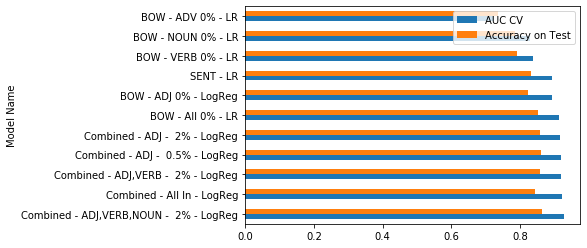

In [122]:
model_resultsumm= {
    'Model Name': [x for x in model_results.keys()],
    'AUC CV': [model_results[x]['AUC CV'] for x in model_results.keys()],
    'Accuracy on Test': [model_results[x]['accuracy test'] for x in model_results.keys()]}

resultsDF = pd.DataFrame(model_resultsumm
                        ).sort_values(by = 'AUC CV', ascending = False
                                     ).set_index('Model Name').plot.barh()


## Model Analysis

In [123]:
model = model_results['Combined - ADJ,VERB,NOUN -  2% - LogReg']['model']

When standarising, usually the mean is removed and values are scaled to unit variance. However, when dealing with sparse matrices with a large number of 0 values it is best practice to keep the mean in the values in order to avoid changing all those zeroes to another value. This is because centering them entails building a dense matrix which in common use cases is likely to be too large to fit in memory.

Therefore, in order to save time when training the models, I did not center values. However, I have retrained the best model with centering in order to simplify interpreting its coefficients. 

In [124]:
model

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=14, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

              precision    recall  f1-score   support

  Bad Review       0.86      0.68      0.76       927
 Good Review       0.86      0.95      0.90      1952

    accuracy                           0.86      2879
   macro avg       0.86      0.82      0.83      2879
weighted avg       0.86      0.86      0.86      2879


Confusion Matrix on Test Data
[[ 633  294]
 [ 100 1852]]


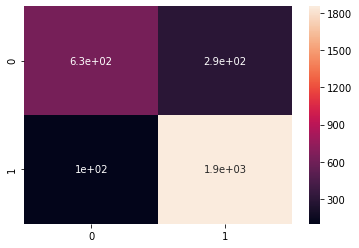

In [125]:
print(model_results['Combined - ADJ,VERB,NOUN -  2% - LogReg']['report'])
print('\nConfusion Matrix on Test Data')

sns.heatmap(model_results['Combined - ADJ,VERB,NOUN -  2% - LogReg']['confusion'], annot = True)
print(model_results['Combined - ADJ,VERB,NOUN -  2% - LogReg']['confusion'])


In [126]:
test_indexes = list(Xtest.index)
test_analysis = reviews[['stars','content','stars_grouped']].loc[test_indexes]
test_analysis['predicted'] = model.predict(Xtest_std_spa)
test_analysis.columns = ['stars','review','y','y_hat']
y_vs_yhat = test_analysis.apply(lambda x: True if x['y'] == x['y_hat'] else False, axis = 1)
test_analysis['prob'] = new = list(model_results['Combined - ADJ,VERB,NOUN -  2% - LogReg']['model'].predict_proba(Xtest_std_spa)[:,1])

KeyError: 'Combined - LogisticRegression'

In [127]:
test_analysis[~y_vs_yhat]['review'].iloc[0]

'The Divina is a very large ship with over 4,000 people capacity. We sailed to the Caribbean and made the mistake of going during spring break and the kids came with parents free so half the ship was kids. They were everywhere, in the bars, the restaurants so it made it difficult to find a place to sit. It is a gorgeous ship with Crystal stairs and lots of glitz. The food was very good and the entertainment was first class. We enjoyed a balcony cabin with adjoined our friends cabin so we could share a lot of time together. We will go on this ship again, just not during a spring break.'

In [23]:
test_analysis.groupby('stars').agg({'review':'count','y vs yhat':'sum'}
                                  ).apply(lambda x: x['y vs yhat']/x['review'], axis = 1)

KeyError: 'y vs yhat'

In [128]:
acc_per_star = test_analysis.groupby('stars').agg({'review':'count','y vs yhat':'sum'}
                                  ).apply(lambda x: x['y vs yhat']/x['review'], axis = 1)
fig, ax = plt.subplots(figsize = (7,5))

sns.barplot(x = acc_per_star.index, y = acc_per_star.values )
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals = 3)), (p.get_x() + 0.25, p.get_height() * 1.01))

KeyError: 'y vs yhat'

In [136]:
test_analysis[~test_analysis['y vs yhat']]['review'].iloc[2]

"The cabin was surprisingly small, however the steward was attentive.   Food in the dining room was disappointing, choice, quantity and quality.  The serving staff was great however.   Food in the buffet area was better.   Entertainment was good, but not so with choices for activities.    Shopping was limited and expensive.    The ship was kept very clean, spotless.   The captain did a great job keeping us informed and in handling the ship very personable and capable.   It was out 60th anniversary and the reason for the trip, would have thought that at least a bottle of champagne was in order, cruise cost enough.    Our favorite watering hole up top was constantly closed as a result of special occasions, another disappointment.  Don't think that we will cruise Celebrity again.   They have lost records of our previous trips, totally at least 8 to date."

In [110]:
test_analysis.shape

(2879, 5)

In [111]:
test_analysis[~test_analysis['y vs yhat']]

,stars,review,y,y_hat,y vs yhat
9571,3,"The Divina is a very large ship with over 4,00...",Bad Review,Good Review,False
5786,3,We did the Ruby Princess Inside Passage/Glacie...,Bad Review,Good Review,False
2598,3,"The cabin was surprisingly small, however the ...",Bad Review,Good Review,False
8239,2,First of all call their customer service line ...,Bad Review,Good Review,False
8470,5,"Family of 4, children aged 10 and 11. The fir...",Good Review,Bad Review,False
...,...,...,...,...,...
7598,5,"We have been on Royal, Carnival and Norwegian ...",Good Review,Bad Review,False
7697,5,I cannot understand how anyone could leave a n...,Good Review,Bad Review,False
8376,3,I am writing this review related to my trip on...,Bad Review,Good Review,False
1370,5,The Insignia was a very nicely appointed ship....,Good Review,Bad Review,False


In [ ]:
test_indexes = list(Xtest.index)
test_analysis = reviews[['stars','content','stars_grouped']].loc[test_indexes]
test_analysis.head()

In [61]:
model_results.keys()

dict_keys(['Combined - ADJ,VERB,NOUN -  2% - LogReg', 'Combined - ADJ,VERB -  2% - LogReg', 'Combined - ADJ -  2% - LogReg', 'Combined - ADJ -  0.5% - LogReg', 'BOW - ADJ 0% - LogReg', 'BOW - NOUN 0% - LR', 'BOW - VERB 0% - LR', 'BOW - ADV 0% - LR', 'BOW - All 0% - LR', 'SENT - LR', 'Combined - All In - LogReg'])

In [80]:
coefficient_df = pd.DataFrame(model_results['Combined - ADJ,VERB,NOUN -  2% - LogReg']['model'].coef_.reshape(-1,1), index = Xtrain_std.columns,columns = ['coefficient']).reset_index()
coefficient_df.columns = ['feature','coefficient']

**Sentiment analysis components**

In [81]:
coefficient_df[coefficient_df.feature.apply(lambda x: 'word' in x)].sort_values(by = 'coefficient')

,feature,coefficient
4,word_count,-0.011663


In [82]:
is_0 = coefficient_df.coefficient.apply(lambda x: np.isclose(x,0))

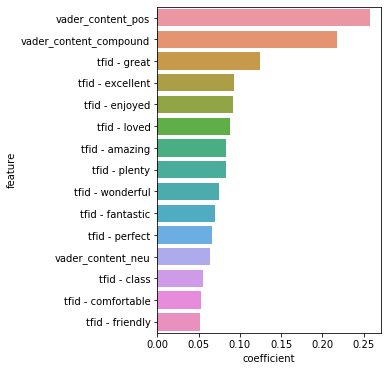

In [96]:
plt.figure(figsize=(4,6));
sns.barplot(x = 'coefficient', y = 'feature', 
            data = coefficient_df.sort_values(by= 'coefficient', ascending=False)[:15]);

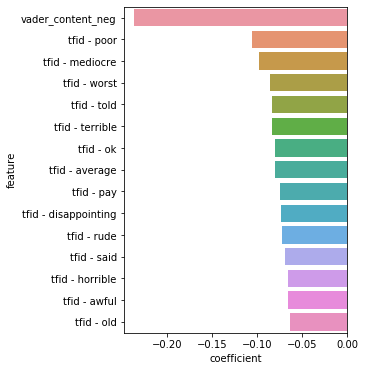

In [97]:
plt.figure(figsize=(4,6));
sns.barplot(x = 'coefficient', y = 'feature',
            data = coefficient_df.sort_values(by= 'coefficient', ascending=True)[:15]);


In [157]:
coefficient_df[is_0].feature.values

array(['vader_content_neu', 'word_count', 'tfid - able',
       'tfid - absolutely', 'tfid - actually', 'tfid - add',
       'tfid - additional', 'tfid - allowed', 'tfid - arrived',
       'tfid - ate', 'tfid - available', 'tfid - avoid', 'tfid - believe',
       'tfid - best', 'tfid - big', 'tfid - biggest', 'tfid - boarded',
       'tfid - boarding', 'tfid - booking', 'tfid - brought',
       'tfid - busy', 'tfid - buy', 'tfid - called', 'tfid - caribbean',
       'tfid - certainly', 'tfid - cheap', 'tfid - choose',
       'tfid - close', 'tfid - cost', 'tfid - crowded', 'tfid - daily',
       'tfid - decent', 'tfid - decided', 'tfid - definitely',
       'tfid - delivered', 'tfid - different', 'tfid - efficient',
       'tfid - enjoyable', 'tfid - entertaining', 'tfid - especially',
       'tfid - expect', 'tfid - expensive', 'tfid - experienced',
       'tfid - extremely', 'tfid - fast', 'tfid - forward', 'tfid - fun',
       'tfid - given', 'tfid - happy', 'tfid - having', 'tfid -

## Different Log Reg Versions

### Bag of words - Adj

In [151]:
#X with adj only
adj_X = word_type_df.apply(lambda x: x['ADJ'], axis = 1)

#Defining target
adj_y = reviews.stars_grouped

#Train_Test
adj_Xtrain, adj_Xtest,adj_ytrain, adj_ytest = train_test_split(adj_X,adj_y,test_size = 0.3, stratify = adj_y, random_state = 14)

#TFID vectoriser
adj_tvec = TfidfVectorizer(strip_accents='unicode', ngram_range=(1,1),stop_words = 'english',max_df=0.5, min_df=0)
adj_train_matrix = adj_tvec.fit_transform(adj_Xtrain)
adj_test_matrix = adj_tvec.transform(adj_Xtest)

# Keeping mean to work with Sparse Matrix
scaler = StandardScaler(with_mean = False)
adj_Xtrain_std = scaler.fit_transform(adj_train_matrix)
adj_Xtest_std = scaler.transform(adj_test_matrix)


#logistic regression parameter dictionaty
log_dict = {
    'Cs':[10],
    'penalty':['l1','l2'],
    'solver': ['liblinear']}

#logistic regression parameter dictionaty
log_grid = grid(
    'BOW - ADJ 0% - LogReg',LogisticRegressionCV(random_state = random_state),log_dict, 
    adj_Xtrain_std,adj_ytrain,
    adj_Xtest_std,adj_ytest,
    scoring = 'roc_auc')

#Coefficients
adj_main_vars = pd.DataFrame({'Coef':model_results['BOW - ADJ 0% - LogReg']['model'].coef_[0]}, 
                             index= adj_tvec.get_feature_names()).sort_values(by='Coef',ascending = False)
adj_main_vars

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   22.5s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.8s finished


Time
Grid fitting took 0:00:37.725840
CV took 0:00:49.441935

Model Scores
Accuracy on train data: 0.9373232097662647
Accuracy on test data: 0.8211184439041334
Accuracy on CV: 0.8280482129560685
Baseline: 0.6779812416257258

AUC CV: 0.892520096438924

Confusion Matrix
[[ 572  355]
 [ 160 1792]]

Classification Report
              precision    recall  f1-score   support

  Bad Review       0.78      0.62      0.69       927
 Good Review       0.83      0.92      0.87      1952

    accuracy                           0.82      2879
   macro avg       0.81      0.77      0.78      2879
weighted avg       0.82      0.82      0.81      2879

Best Estimator Parameters
{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 14, 'refit': True, 'scoring': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0}


,Coef
great,0.215094
excellent,0.156587
amazing,0.139716
wonderful,0.124494
fantastic,0.108296
...,...
horrible,-0.077476
rude,-0.097156
terrible,-0.097278
worst,-0.101164


### Bag of words - Nouns

In [152]:
#X with noun only
noun_X = word_type_df.apply(lambda x: x['NOUN'], axis = 1)

#Defining target
noun_y = reviews.stars_grouped

#Train_Test
noun_Xtrain, noun_Xtest,noun_ytrain, noun_ytest = train_test_split(noun_X,noun_y,test_size = 0.3, stratify = noun_y, random_state = 14)

#TFID vectoriser
noun_tvec = TfidfVectorizer(strip_accents='unicode', ngram_range=(1,1),stop_words = 'english',max_df=0.5, min_df=0)
noun_train_matrix = noun_tvec.fit_transform(noun_Xtrain)
noun_test_matrix = noun_tvec.transform(noun_Xtest)

# Keeping mean to work with Sparse Matrix
scaler = StandardScaler(with_mean = False)
noun_Xtrain_std = scaler.fit_transform(noun_train_matrix)
noun_Xtest_std = scaler.transform(noun_test_matrix)


#logistic regression parameter dictionaty
log_dict = {
    'Cs':[10],
    'penalty':['l1','l2'],
    'solver': ['liblinear']}

#logistic regression parameter dictionaty
log_grid = grid(
    'BOW - NOUN 0% - LR',LogisticRegressionCV(random_state = random_state),log_dict, 
    noun_Xtrain_std,noun_ytrain,
    noun_Xtest_std,noun_ytest,
    scoring = 'roc_auc')

noun_main_vars = pd.DataFrame({'Coef':model_results['BOW - NOUN 0% - LR']['model'].coef_[0]}, 
                             index= noun_tvec.get_feature_names()).sort_values(by='Coef',ascending = False)
noun_main_vars

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   14.9s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.4s finished


Time
Grid fitting took 0:00:19.084423
CV took 0:00:10.132231

Model Scores
Accuracy on train data: 0.970522554711925
Accuracy on test data: 0.783605418548107
Accuracy on CV: 0.7792148663262773
Baseline: 0.6779812416257258

AUC CV: 0.8288468183521172

Confusion Matrix
[[ 503  424]
 [ 199 1753]]

Classification Report
              precision    recall  f1-score   support

  Bad Review       0.72      0.54      0.62       927
 Good Review       0.81      0.90      0.85      1952

    accuracy                           0.78      2879
   macro avg       0.76      0.72      0.73      2879
weighted avg       0.78      0.78      0.77      2879

Best Estimator Parameters
{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 14, 'refit': True, 'scoring': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0}


,Coef
plenty,0.374474
crew,0.203019
views,0.179604
options,0.157143
class,0.152957
...,...
positives,-0.190005
hours,-0.192510
money,-0.211811
desk,-0.213033


### Bag of words - Verbs

In [153]:
#X with verb only
verb_X = word_type_df.apply(lambda x: x['VERB'], axis = 1)

#Defining target
verb_y = reviews.stars_grouped

#Train_Test
verb_Xtrain, verb_Xtest,verb_ytrain, verb_ytest = train_test_split(verb_X,verb_y,test_size = 0.3, stratify = verb_y, random_state = 14)

#TFID vectoriser
verb_tvec = TfidfVectorizer(strip_accents='unicode', ngram_range=(1,1),stop_words = 'english',max_df=0.5, min_df=0)
verb_train_matrix = verb_tvec.fit_transform(verb_Xtrain)
verb_test_matrix = verb_tvec.transform(verb_Xtest)

# Keeping mean to work with Sparse Matrix
scaler = StandardScaler(with_mean = False)
verb_Xtrain_std = scaler.fit_transform(verb_train_matrix)
verb_Xtest_std = scaler.transform(verb_test_matrix)


#logistic regression parameter dictionaty
log_dict = {
    'Cs':[10],
    'penalty':['l1','l2'],
    'solver': ['liblinear']}

#logistic regression parameter dictionaty
log_grid = grid(
    'BOW - VERB 0% - LR',LogisticRegressionCV(random_state = random_state),log_dict, 
    verb_Xtrain_std,verb_ytrain,
    verb_Xtest_std,verb_ytest,
    scoring = 'roc_auc')

#Coefficients
verb_main_vars = pd.DataFrame({'Coef':model_results['BOW - VERB 0% - LR']['model'].coef_[0]}, 
                             index= verb_tvec.get_feature_names()).sort_values(by='Coef',ascending = False)
verb_main_vars

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   16.4s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.6s finished


Time
Grid fitting took 0:02:31.839367
CV took 0:00:08.856664

Model Scores
Accuracy on train data: 0.9423849933005806
Accuracy on test data: 0.7908996179228899
Accuracy on CV: 0.7885957389284828
Baseline: 0.6779812416257258

AUC CV: 0.8360108928905557

Confusion Matrix
[[ 506  421]
 [ 181 1771]]

Classification Report
              precision    recall  f1-score   support

  Bad Review       0.74      0.55      0.63       927
 Good Review       0.81      0.91      0.85      1952

    accuracy                           0.79      2879
   macro avg       0.77      0.73      0.74      2879
weighted avg       0.78      0.79      0.78      2879

Best Estimator Parameters
{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 14, 'refit': True, 'scoring': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0}


,Coef
enjoyed,0.427368
loved,0.368724
recommend,0.182494
appointed,0.165017
love,0.153444
...,...
complained,-0.180115
pay,-0.181999
ruined,-0.196035
care,-0.221513


### Bag of words - Adverbs

In [154]:
#X with adv only
adv_X = word_type_df.apply(lambda x: x['ADV'], axis = 1)

#Defining target
adv_y = reviews.stars_grouped

#Train_Test
adv_Xtrain, adv_Xtest,adv_ytrain, adv_ytest = train_test_split(adv_X,adv_y,test_size = 0.3, stratify = adv_y, random_state = 14)

#TFID vectoriser
adv_tvec = TfidfVectorizer(strip_accents='unicode', ngram_range=(1,1),stop_words = 'english',max_df=0.5, min_df=0)
adv_train_matrix = adv_tvec.fit_transform(adv_Xtrain)
adv_test_matrix = adv_tvec.transform(adv_Xtest)

# Keeping mean to work with Sparse Matrix
scaler = StandardScaler(with_mean = False)
adv_Xtrain_std = scaler.fit_transform(adv_train_matrix)
adv_Xtest_std = scaler.transform(adv_test_matrix)


#logistic regression parameter dictionaty
log_dict = {
    'Cs':[10],
    'penalty':['l1','l2'],
    'solver': ['liblinear']}

#logistic regression parameter dictionaty
log_grid = grid(
    'BOW - ADV 0% - LR',LogisticRegressionCV(random_state = random_state),log_dict, 
    adv_Xtrain_std,adv_ytrain,
    adv_Xtest_std,adv_ytest,
    scoring = 'roc_auc')

#Coefficients
adv_main_vars = pd.DataFrame({'Coef':model_results['BOW - ADV 0% - LR']['model'].coef_[0]}, 
                             index= adv_tvec.get_feature_names()).sort_values(by='Coef',ascending = False)
adv_main_vars

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


Time
Grid fitting took 0:00:03.100465
CV took 0:00:01.290977

Model Scores
Accuracy on train data: 0.7947000148875987
Accuracy on test data: 0.7360194511983328
Accuracy on CV: 0.7315770928624615
Baseline: 0.6779812416257258

AUC CV: 0.724359060889496

Confusion Matrix
[[ 348  579]
 [ 181 1771]]

Classification Report
              precision    recall  f1-score   support

  Bad Review       0.66      0.38      0.48       927
 Good Review       0.75      0.91      0.82      1952

    accuracy                           0.74      2879
   macro avg       0.71      0.64      0.65      2879
weighted avg       0.72      0.74      0.71      2879

Best Estimator Parameters
{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 14, 'refit': True, 'scoring': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0}


,Coef
highly,0.319014
thoroughly,0.172476
beautifully,0.120337
definitely,0.109962
pleasantly,0.106169
...,...
eventually,-0.128120
later,-0.128651
completely,-0.148025
finally,-0.195501


### Bag of words - Combined

In [155]:
#X with aavn only
aavn_X = word_type_df.apply(lambda x:  x['ADJ']+' '+x['ADV']+' '+x['VERB']+' '+x['NOUN'], axis = 1)

#Defining target
aavn_y = reviews.stars_grouped

#Train_Test
aavn_Xtrain, aavn_Xtest,aavn_ytrain, aavn_ytest = train_test_split(aavn_X,aavn_y,test_size = 0.3, stratify = aavn_y, random_state = 14)

#TFID vectoriser
aavn_tvec = TfidfVectorizer(strip_accents='unicode', ngram_range=(1,1),stop_words = 'english',max_df=0.5, min_df=0)
aavn_train_matrix = aavn_tvec.fit_transform(aavn_Xtrain)
aavn_test_matrix = aavn_tvec.transform(aavn_Xtest)

# Keeping mean to work with Sparse Matrix
scaler = StandardScaler(with_mean = False)
aavn_Xtrain_std = scaler.fit_transform(aavn_train_matrix)
aavn_Xtest_std = scaler.transform(aavn_test_matrix)


#logistic regression parameter dictionaty
log_dict = {
    'Cs':[10],
    'penalty':['l1','l2'],
    'solver': ['liblinear']}

#logistic regression parameter dictionaty
log_grid = grid(
    'BOW - All 0% - LR',LogisticRegressionCV(random_state = random_state),log_dict, 
    aavn_Xtrain_std,aavn_ytrain,
    aavn_Xtest_std,aavn_ytest,
    scoring = 'roc_auc')

aavn_main_vars = pd.DataFrame({'Coef':model_results['BOW - All 0% - LR']['model'].coef_[0]}, 
                             index= aavn_tvec.get_feature_names()).sort_values(by='Coef',ascending = False)
aavn_main_vars

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   16.5s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.3s finished


Time
Grid fitting took 0:00:22.008387
CV took 0:00:10.415483

Model Scores
Accuracy on train data: 0.9915140687807057
Accuracy on test data: 0.8523792983674887
Accuracy on CV: 0.850378616636528
Baseline: 0.6779812416257258

AUC CV: 0.9136506960776092

Confusion Matrix
[[ 653  274]
 [ 151 1801]]

Classification Report
              precision    recall  f1-score   support

  Bad Review       0.81      0.70      0.75       927
 Good Review       0.87      0.92      0.89      1952

    accuracy                           0.85      2879
   macro avg       0.84      0.81      0.82      2879
weighted avg       0.85      0.85      0.85      2879

Best Estimator Parameters
{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 14, 'refit': True, 'scoring': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0}


,Coef
great,0.600588
excellent,0.431847
plenty,0.309474
loved,0.304674
enjoyed,0.297788
...,...
told,-0.246816
terrible,-0.255909
mediocre,-0.263627
worst,-0.332425


In [156]:

# Defining predictors
Xsent = reviews[['vader_content_compound', 
                        'vader_content_neg',
                        'vader_content_neu', 
                        'vader_content_pos',
                        'word_count']]


#Defining target
ysent = reviews.stars_grouped

#Train_Test
Xsent_train, Xsent_test,ysent_train, ysent_test = train_test_split(Xsent,ysent,test_size = 0.3, stratify = ysent, random_state = 14)

# Keeping mean to work with Sparse Matrix
scaler = StandardScaler(with_mean = True)
Xsent_train_std = pd.DataFrame(scaler.fit_transform(Xsent_train),columns = Xsent_train.columns, index = Xsent_train.index)
Xsent_test_std = pd.DataFrame(scaler.transform(Xsent_test),columns = Xsent_test.columns, index = Xsent_test.index)

#logistic regression parameter dictionaty
log_dict = {
    'Cs':[10],
    'penalty':['l1','l2'],
    'solver': ['liblinear']}

#logistic regression parameter dictionaty
log_grid = grid(
    'SENT - LR',LogisticRegressionCV(random_state = random_state),log_dict, 
    Xsent_train_std,ysent_train,
    Xsent_test_std,ysent_test,
    scoring = 'roc_auc')



Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished


Time
Grid fitting took 0:00:06.395204
CV took 0:00:08.757807

Model Scores
Accuracy on train data: 0.8308768795593271
Accuracy on test data: 0.8308440430705106
Accuracy on CV: 0.8313232413218452
Baseline: 0.6779812416257258

AUC CV: 0.8915980899463254

Confusion Matrix
[[ 627  300]
 [ 187 1765]]

Classification Report
              precision    recall  f1-score   support

  Bad Review       0.77      0.68      0.72       927
 Good Review       0.85      0.90      0.88      1952

    accuracy                           0.83      2879
   macro avg       0.81      0.79      0.80      2879
weighted avg       0.83      0.83      0.83      2879

Best Estimator Parameters
{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 14, 'refit': True, 'scoring': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0}


# Stats Model

In [22]:
import statsmodels.api as sm

In [23]:
log_model = sm.Logit(label_binarize(ytrain, classes=['Bad Review','Good Review']), sm.add_constant(Xtrain_std))
 results.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.24222127329164103
            Iterations: 87
            Function evaluations: 90
            Gradient evaluations: 87


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6717
Model:                          Logit   Df Residuals:                     6078
Method:                           MLE   Df Model:                          638
Date:                Mon, 02 Mar 2020   Pseudo R-squ.:                  0.6145
Time:                        10:36:09   Log-Likelihood:                -1627.0
converged:                       True   LL-Null:                       -4220.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0765    105.504      0.001      0.999    -206.708     206.862
vader_content_compound    -0.0057      0.085     -0.067      0.947      -0.172       0.161
vader_content_neg         -0.9164      4.856     -0.189      0.850     -10.434       8.601
vader_content_neu          0.0897      9.425      0.010      0.992     -18.384      18.563
vader_content_pos          1.0088     10.687      0.094      0.925     -19.937      21.955
word_count                 0.0619      0.084      0.738      0.460      -0.102       0.226
tfid - 2nd                 0.0095      0.061      0.157      0.875      -0.109       0.128
tfid - able               -0.0284      0.048     -0.594      0.553      -0.122       0.065
tfid - access              0.0798      0.051      1.561      0.119      -0.020       0.180
tfid - activities          0.0088      0.056      0.158      0.875      -0.101       0.119
tfid - add                -0.0109      0.050     -0.220      0.826      -0.108       0.086
tfid - added              -0.0239      0.046     -0.519      0.604      -0.114       0.066
tfid - additional         -0.0216      0.044     -0.485      0.628      -0.109       0.066
tfid - adequate           -0.1255      0.043     -2.930      0.003      -0.209      -0.042
tfid - adult               0.0529      0.052      1.022      0.307      -0.048       0.154
tfid - adults             -0.0798      0.051     -1.560      0.119      -0.180       0.020
tfid - advance            -0.0486      0.046     -1.059      0.290      -0.139       0.041
tfid - afternoon           0.0207      0.056      0.373      0.709      -0.088       0.130
tfid - age                -0.0958      0.044     -2.191      0.028      -0.182      -0.010
tfid - air                 0.0176      0.044      0.400      0.689      -0.069       0.104
tfid - airport             0.0626      0.050      1.243      0.214      -0.036       0.161
tfid - allowed            -0.0569      0.044     -1.300      0.193      -0.143       0.029
tfid - amazing             0.2118      0.080      2.663      0.008       0.056       0.368
tfid - amenities           0.0173      0.052      0.331      0.740      -0.085       0.120
tfid - area               -0.0706      0.048     -1.469      0.142      -0.165       0.024
tfid - areas              -0.0703      0.048     -1.459      0.145      -0.165       0.024
tfid - arrival            -0.0012      0.048     -0.025      0.980      -0.095       0.093
tfid - arrived             0.0114      0.047      0.241      0.810      -0.081       0.104
tfid - ask                -0.0307      0.050     -0.619      0.536      -0.128       0.067
tfid - asked              -0.0436      0.048     -0.900      0.368      -0.139       0.051
tfid - ate                -0.0560      0.052     -1.070      0.284      -0.159       0.047
tfid - atmosphere          0.0334      0.058      0.571      0.568      -0.081       0.148
tfid - attendant           0.0544      0.055      0.994 

In [252]:
from sklearn.linear_model import LogisticRegression

In [256]:
model_results['Combined - 371 Feats - LogisticRegression']['model']

LogisticRegressionCV(Cs=20, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l1', random_state=14,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [1]:
coefficient_df[:50]

NameError: name 'coefficient_df' is not defined

In [258]:
#logistic regression parameter dictionaty
log_dict = {
    'C':np.logspace(-4,4,10),
    'penalty':['l1','l2'],
    'solver': ['liblinear']}

#logistic regression parameter dictionaty
log_grid = grid(
    'Combined - 371 Feats - 1C - LogisticRegression',LogisticRegression(random_state = random_state),log_dict, 
    Xtrain_std_spa,ytrain,
    Xtest_std_spa,ytest,
    scoring = 'roc_auc')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.5s finished


Time
Grid fitting took 0:00:19.660461
CV took 0:00:00.771891

Model Scores
Accuracy on train data: 0.8734554116421022
Accuracy on test data: 0.8655783258075721
Accuracy on CV: 0.8572280345621242
Baseline: 0.6779812416257258

AUC CV: 0.920714639609538

Confusion Matrix
[[ 734  193]
 [ 194 1758]]

Classification Report
              precision    recall  f1-score   support

  Bad Review       0.79      0.79      0.79       927
 Good Review       0.90      0.90      0.90      1952

   micro avg       0.87      0.87      0.87      2879
   macro avg       0.85      0.85      0.85      2879
weighted avg       0.87      0.87      0.87      2879

Best Estimator Parameters
{'C': 0.000774263682681127, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': 14, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [200]:
model_results.keys()

dict_keys(['Combined - ADJ,VERB,NOUN -  2% - LogReg', 'Combined - ADJ,VERB -  2% - LogReg', 'Combined - ADJ -  2% - LogReg', 'Combined - ADJ -  0.5% - LogReg', 'BOW - ADJ 0% - LogReg', 'BOW - NOUN 0% - LR', 'BOW - VERB 0% - LR', 'BOW - ADV 0% - LR', 'BOW - All 0% - LR', 'SENT - LR', 'Combined - All In - LogReg'])

In [228]:
print(model_results['Combined - ADJ,VERB,NOUN -  2% - LogReg']['confusion'])

[[ 633  294]
 [ 100 1852]]


# ROC Curve

In [27]:
model = model_results['Combined - ADJ,VERB,NOUN -  2% - LogReg']['model']

model_50_threshold_TPR = 633/(633+294)
model_50_threshold_FPR = 100/(100+1852)

print(model_50_threshold_TPR)
print(model_50_threshold_FPR)

0.6828478964401294
0.05122950819672131


In [40]:
ytest

9571     Bad Review
452     Good Review
9578    Good Review
7096    Good Review
7381    Good Review
           ...     
8489     Bad Review
2122    Good Review
4450    Good Review
667     Good Review
1443    Good Review
Name: stars_grouped, Length: 2879, dtype: object

In [60]:
probabilities = pd.DataFrame(model.predict_proba(Xtest_std_spa), columns = ['Bad','Good'])

prob = []
tp = []
fn = []
fp = []
tn = []
    
for p in np.linspace(0,1,21):
    y_hat = probabilities.Bad.apply(lambda x : 'Bad Review' if x>p else 'Good Review')
    conf = confusion_matrix(ytest,y_hat)
    prob.append(p)
    tp.append(conf[0][0])
    fn.append(conf[0][1])
    fp.append(conf[1][0])
    tn.append(conf[1][1])

thresholds = pd.DataFrame({'tp':tp,'fn':fn,'fp':fp,'tn':tn},index = prob)
thresholds['True_Positive_Rate'] = thresholds.apply(lambda x: x['tp']/(x['fn']+x['tp']),axis = 1)
thresholds['False_Positive_Rate'] = thresholds.apply(lambda x: x['fp']/(x['tn']+x['fp']),axis = 1)
thresholds['Precision'] = thresholds.apply(lambda x: x['tp']/(x['tp']+x['fp']),axis = 1)

In [76]:
thresholds

,tp,fn,fp,tn,True_Positive_Rate,False_Positive_Rate,Precision
0.00,927,0,1952,0,1.000000,1.000000,0.321987
0.05,925,2,1672,280,0.997843,0.856557,0.356180
0.10,918,9,1142,810,0.990291,0.585041,0.445631
0.15,899,28,809,1143,0.969795,0.414447,0.526347
0.20,869,58,577,1375,0.937433,0.295594,0.600968
0.25,832,95,414,1538,0.897519,0.212090,0.667737
0.30,801,126,307,1645,0.864078,0.157275,0.722924
0.35,776,151,232,1720,0.837109,0.118852,0.769841
0.40,732,195,162,1790,0.789644,0.082992,0.818792
0.45,688,239,126,1826,0.742179,0.064549,0.845209


In [37]:
probabilities

,Bad,Good
0,0.160720,0.839280
1,0.020795,0.979205
2,0.099822,0.900178
3,0.201566,0.798434
4,0.218896,0.781104
...,...,...
2874,0.555807,0.444193
2875,0.067966,0.932034
2876,0.114856,0.885144
2877,0.028448,0.971552


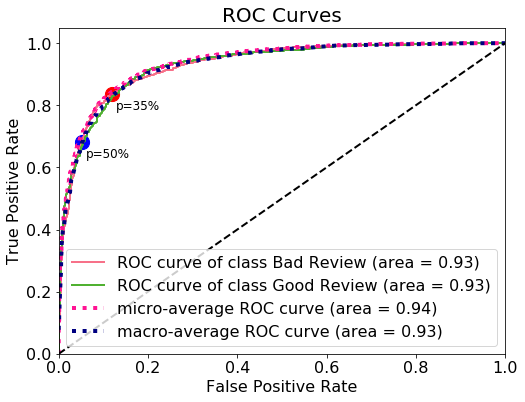

In [98]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

skplt.metrics.plot_roc(ytest, model.predict_proba(Xtest_std_spa), plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)

plt.scatter(thresholds.loc[0.5,'False_Positive_Rate'], thresholds.loc[0.5,'True_Positive_Rate'], s = 200,c = 'blue')
plt.scatter(thresholds.loc[0.35000000000000003,'False_Positive_Rate'], thresholds.loc[0.35000000000000003,'True_Positive_Rate'], s = 200, c = 'red')

plt.text(thresholds.loc[0.35000000000000003,'False_Positive_Rate']+0.01, thresholds.loc[0.35000000000000003,'True_Positive_Rate']-0.05, 'p=35%', fontsize=12)
plt.text(thresholds.loc[0.5,'False_Positive_Rate']+0.01, thresholds.loc[0.5,'True_Positive_Rate']-0.05, 'p=50%', fontsize=12)

plt.show()



In [72]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

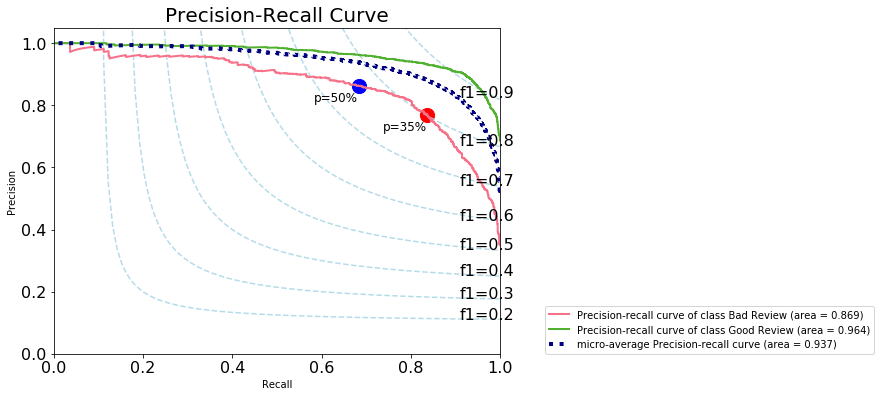

In [92]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(ytest, model.predict_proba(Xtest_std_spa),
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])

plt.scatter(thresholds.loc[0.5,'True_Positive_Rate'], thresholds.loc[0.5,'Precision'], s = 200,c = 'blue')
plt.scatter(thresholds.loc[0.35000000000000003,'True_Positive_Rate'], thresholds.loc[0.35000000000000003,'Precision'], s = 200, c = 'red')

plt.text(thresholds.loc[0.35000000000000003,'True_Positive_Rate']-0.1, thresholds.loc[0.35000000000000003,'Precision']-0.05, 'p=35%', fontsize=12)
plt.text(thresholds.loc[0.5,'True_Positive_Rate']-0.1, thresholds.loc[0.5,'Precision']-0.05, 'p=50%', fontsize=12)

plt.show()


Text(0.837108953613808, 0.692857142857143, 'p=35')

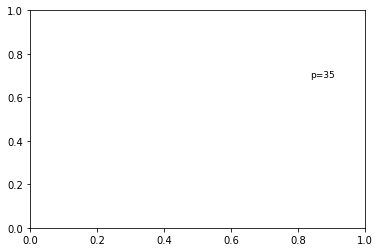

In [79]:
plt.text(thresholds.loc[0.35000000000000003,'True_Positive_Rate'], thresholds.loc[0.35000000000000003,'Precision']*0.9, 'p=35', fontsize=9)